In [3]:
#This whole enchilada is Frankensteined from Alfonso Garcia Soto's and Leander Fischer's useful processing scripts

import os
from os.path import expandvars
import glob
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

from icecube.icetray import I3Tray
from icecube import icetray, dataio, dataclasses, LeptonInjector
from icecube import tableio, hdfwriter
from I3Tray import I3Units

from icecube.LeptonInjector import hdf5_to_feather

<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for I3Time already registered; second conversion method ignored.
<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for boost::shared_ptr<I3Time> already registered; second conversion method ignored.
<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for I3Time::Month already registered; second conversion method ignored.
<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for I3Time::Weekday already registered; second conversion method ignored.
<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for I3Position already registered; second conversion method ignored.
<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for boost::shared_ptr<I3Position> already registered; second conversion method ignored.
<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for I3Position::RefFrame already registered; second

/data/user/jbook/i3/build/lib/icecube/LeptonInjector/__init__.py:1: UserWarning: Deprication Warning: load_pybindings() is deprecated use `from icecube._your_module import *`
  from icecube.load_pybindings import load_pybindings
/data/user/jbook/i3/build/lib/icecube/LeptonInjector/cascade_generator_functions.py:4: UserWarning: Using `import I3Tray` or `from I3Tray import *` is now considered depricated. Please switch to using `from icecube.icetray import I3Tray`
  from I3Tray import I3Units


In [4]:
style_file = os.path.expandvars('$I3_SRC/LeptonInjector/python/hnl_mpl_plotstyle.mplstyle')
plt.style.use(style_file)

base_plot_dir = '/data/user/jbook/I3_HNL_Search/validation/plots/paper'
print(base_plot_dir)

/data/user/jbook/I3_HNL_Search/validation/plots/paper


# Step 1: Extract your data from hdf5 files and save in a dictionary

In [5]:
# Below are all keys stored in the hdf5 files. 
# If you're only interested in a few quantities, feel free to extract only those variables.

keys_to_extract = [
    ###################
    # EventProperties #
    ###################
    "decay_channel", #integer values corresponsing to HNL decay mose
    "distance",      #decay length of the HNL
    "distanceMax",   #Maximum allowed "distance" value
    "distanceMin",   #Minimum allowed "distance" value
    "finalStateX",   #Bjorken X
    "finalStateY",   #Inelasticity
    "final_state_particle0", #PDG code for final state particles
    "final_state_particle1",
    "primary_type",  #PDG code for initial particles ( (-)15 for tau (anti-)neutrinos)
    "lifetime",      #HNL lifetime
    "mHNL",          #HNL mass - a constant value chosen by user - 0.1, 0.3, 0.6, 1.0 GeV
    "outgoing_neutrino_energy",
    "totalEnergy",  
    "physical",      #Is this particle physically possible? Should always be 1
    "total_column_depth",
    
    ###################
    # I3MCTree        #
    ###################
    
    ### true HNL variables
    "HNL_true_x",
    "HNL_true_y",
    "HNL_true_z",
    "HNL_true_energy",
    "HNL_true_zenith",
    "HNL_true_azimuth",
    "HNL_true_time",  
    
    ### true primary variables
    "true_x",
    "true_y",
    "true_z",
    "true_energy",
    "true_zenith",
    "true_azimuth",
    "true_time",
    
     ### true first (DIS) cascade variables
     "casc0_true_x",
     "casc0_true_y",
     "casc0_true_z",
     "casc0_true_energy",
     "casc0_true_zenith",
     "casc0_true_azimuth",
     "casc0_true_time",  
    
     ### true second (HNL decay) cascade variables
     "casc1_true_x",
     "casc1_true_y",
     "casc1_true_z",
     "casc1_true_energy",
     "casc1_true_zenith",
     "casc1_true_azimuth",
     "casc1_true_time",    
     "nan_decay_energy",  #Was the neutrino simulated without a decay energy? Should be zero for all particles
]

In [6]:
# What's the base directory for your simulation set?
sim_base_dir = '/data/user/jbook/I3_HNL_Search/validation/testfiles_Feb5_24/'  

# When simulating sets at multiple masses, list the file prefixes for each mass here
levels = ['Gen_01', 'Gen_03', 'Gen_06', 'Gen_10']

# dict for infilepaths
infiles = OrderedDict(zip(levels, [list() for level in levels]))
print(infiles)

OrderedDict([('Gen_01', []), ('Gen_03', []), ('Gen_06', []), ('Gen_10', [])])


In [7]:
# get the infilepaths
for key, item in infiles.items():
    print(key)  
    item.extend(
        glob.glob(os.path.join(sim_base_dir+ '/{}*.hdf5'.format(key))) #for test files
    )
    # We read in every file in you sim_base_dir with a key at the beginning of its file name
    # List the infile paths - use this to check the paths are correct
    print(item)

Gen_01
['/data/user/jbook/I3_HNL_Search/validation/testfiles_Feb5_24/Gen_01Gev.hdf5']
Gen_03
['/data/user/jbook/I3_HNL_Search/validation/testfiles_Feb5_24/Gen_03Gev.hdf5']
Gen_06
['/data/user/jbook/I3_HNL_Search/validation/testfiles_Feb5_24/Gen_06Gev.hdf5']
Gen_10
['/data/user/jbook/I3_HNL_Search/validation/testfiles_Feb5_24/Gen_10Gev.hdf5']


In [8]:
# read in the hdf files and store the dataframes
data = OrderedDict()

for key, item in infiles.items():   
    data[key] = hdf5_to_feather(item, keys=keys_to_extract, outfilepath=base_plot_dir+"/testfiles.feather")        

INFO:root:Keys to be extracted: dict_keys(['decay_channel', 'distance', 'distanceMax', 'distanceMin', 'finalStateX', 'finalStateY', 'final_state_particle0', 'final_state_particle1', 'primary_type', 'lifetime', 'mHNL', 'outgoing_neutrino_energy', 'totalEnergy', 'physical', 'total_column_depth', 'HNL_true_x', 'HNL_true_y', 'HNL_true_z', 'HNL_true_energy', 'HNL_true_zenith', 'HNL_true_azimuth', 'HNL_true_time', 'true_x', 'true_y', 'true_z', 'true_energy', 'true_zenith', 'true_azimuth', 'true_time', 'casc0_true_x', 'casc0_true_y', 'casc0_true_z', 'casc0_true_energy', 'casc0_true_zenith', 'casc0_true_azimuth', 'casc0_true_time', 'casc1_true_x', 'casc1_true_y', 'casc1_true_z', 'casc1_true_energy', 'casc1_true_zenith', 'casc1_true_azimuth', 'casc1_true_time', 'nan_decay_energy'])
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.93s/it]
INFO:root:Keys to be extracted: dict_keys(['decay_channel', 'distance', 'distanceMax', 'distanceMin', 'finalStateX', 'finalStateY', 'fi

In [9]:
# Due to energy sampling, some events produced are non-physical
# these frames should not be saved. 
# Instead, expect fewer events than the generator input.
# Losses should be around 3% or less

print('Events per file:')
for key, item in data.items():
    print('{:5}: {:6}'.format(key, len(item)))

Events per file:
Gen_01:  25000
Gen_03:  24214
Gen_06:  24043
Gen_10:  24387


# Make plots for paper
## Branching ratio - simulation/theory comparison

In [10]:
from icecube.LeptonInjector import HNLDecayEnergy
FullWidth = np.vectorize( lambda x: HNLDecayEnergy.FullWidth(x) )

gamma_nu_nu_nu_overload = np.vectorize( lambda x: HNLDecayEnergy.gamma_nu_nu_nu_overload(x) )
gamma_e_e = np.vectorize( lambda x: HNLDecayEnergy.gamma_e_e(x) )
gamma_p0_nu = np.vectorize( lambda x: HNLDecayEnergy.gamma_p0_nu(x) )
gamma_nu_mu_mu = np.vectorize( lambda x: HNLDecayEnergy.gamma_nu_mu_mu(x) )
gamma_eta_nu = np.vectorize( lambda x: HNLDecayEnergy.gamma_eta_nu(x) )
gamma_rho0_nu = np.vectorize( lambda x: HNLDecayEnergy.gamma_rho0_nu(x) )
gamma_omega_nu = np.vectorize( lambda x: HNLDecayEnergy.gamma_omega_nu(x) )
gamma_etaprime_nu = np.vectorize( lambda x: HNLDecayEnergy.gamma_etaprime_nu(x) )
gamma_phi_nu = np.vectorize( lambda x: HNLDecayEnergy.gamma_phi_nu(x) )
gamma_nue_e_tau = np.vectorize( lambda x: HNLDecayEnergy.gamma_nue_e_tau(x) )
gamma_numu_mu_tau = np.vectorize( lambda x: HNLDecayEnergy.gamma_numu_mu_tau(x) )
gamma_tau_pi = np.vectorize( lambda x: HNLDecayEnergy.gamma_tau_pi(x) )
gamma_tau_K = np.vectorize( lambda x: HNLDecayEnergy.gamma_tau_K(x) )
gamma_tau_rho = np.vectorize( lambda x: HNLDecayEnergy.gamma_tau_rho(x) )

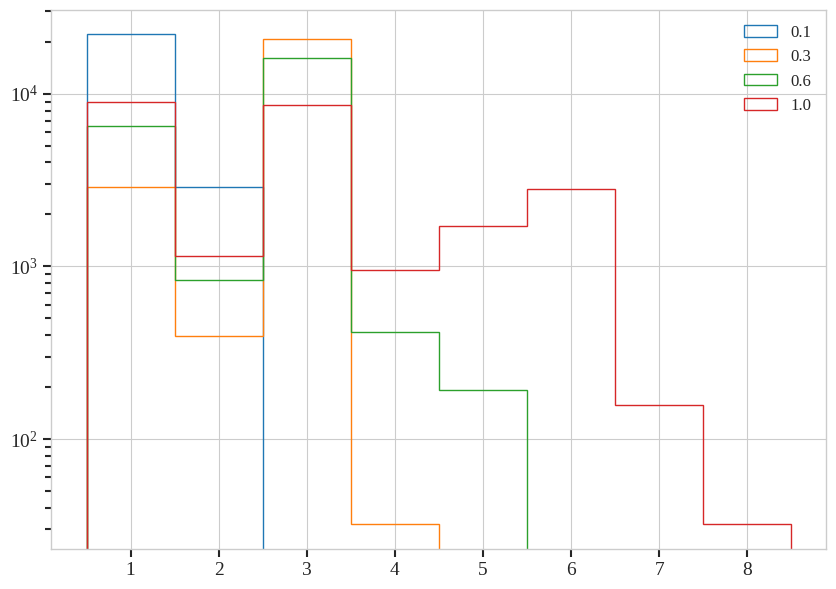

In [11]:
decay_channels = [r'$\nu\nu\nu$', r'$\nu_\tau e^+e^-$', r'$\nu_\tau\pi^0$', r'$\nu_\tau \mu^+\mu^-$',
                   r'$\nu_\tau\eta$', r'$\nu_\tau\rho^0$', r'$\nu_\tau\omega$', r'$\nu_\tau\eta\prime$']

bins = np.linspace (0.5, 8.5, 9)

n2, b, p = plt.hist(data['Gen_01']['decay_channel'], bins = bins, histtype = 'step', label = '0.1')
br_01 = n2/len(data['Gen_01']['decay_channel'])
err_01 = np.sqrt(n2)/len(data['Gen_01']['decay_channel'])

n1, b, p = plt.hist(data['Gen_03']['decay_channel'], bins = bins, histtype = 'step', label = '0.3')
br_03 = n1/len(data['Gen_03']['decay_channel'])
err_03 = np.sqrt(n1)/len(data['Gen_03']['decay_channel'])


n, b, p = plt.hist(data['Gen_06']['decay_channel'], bins = bins, histtype = 'step', label = '0.6')
br_06 = n/len(data['Gen_06']['decay_channel'])
err_06 = np.sqrt(n)/len(data['Gen_06']['decay_channel'])


n3, b, p = plt.hist(data['Gen_10']['decay_channel'], bins = bins, histtype = 'step', label = '1.0')
br_10 = n3/len(data['Gen_10']['decay_channel'])
err_10 = np.sqrt(n3)/len(data['Gen_10']['decay_channel'])


plt.yscale('log')
plt.legend()

In [12]:
masses = [0.1, 0.3, 0.6, 1.0]
branches = {}
errors = {}
i = 0
for mode in decay_channels:
    branches[mode] = [br_01[i], br_03[i], br_06[i], br_10[i],]
    errors[mode] = [err_01[i], err_03[i], err_06[i], err_10[i],]
    i+=1

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/

/data/user/jbook/I3_HNL_Search/validation/plots/paper/branching_ratios_with_data.png


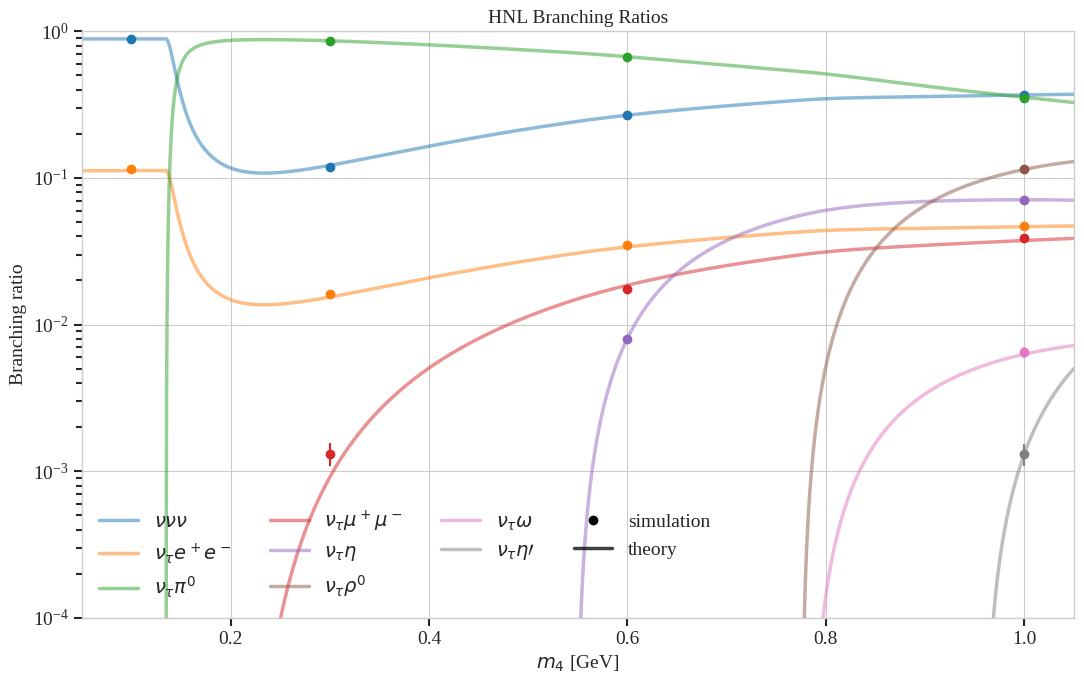

In [13]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']

hnl_mass = np.linspace(0.05, 1.05, 2000)
    
full_decay_width = FullWidth(hnl_mass)

decay_00 = gamma_nu_nu_nu_overload(hnl_mass)
decay_01 = gamma_e_e(hnl_mass)
decay_02 = gamma_p0_nu(hnl_mass)
decay_03 = gamma_nu_mu_mu(hnl_mass)
decay_04 = gamma_eta_nu(hnl_mass)
decay_05 = gamma_rho0_nu(hnl_mass)
decay_06 = gamma_omega_nu(hnl_mass)
decay_07 = gamma_etaprime_nu(hnl_mass)
decay_08 = gamma_phi_nu(hnl_mass)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11,7))

lw_sub = 2.5

# plot branching ratios
ax.plot(hnl_mass, decay_00/full_decay_width, lw=lw_sub, label=r'$\nu\nu\nu$', alpha = 0.5)
ax.plot(hnl_mass, decay_01/full_decay_width, lw=lw_sub, label=r'$\nu_\tau e^+e^-$', alpha = 0.5)
ax.plot(hnl_mass, decay_02/full_decay_width, lw=lw_sub, label=r'$\nu_\tau\pi^0$', alpha = 0.5)
ax.plot(hnl_mass, decay_03/full_decay_width, lw=lw_sub, label=r'$\nu_\tau \mu^+\mu^-$', alpha = 0.5)
ax.plot(hnl_mass, decay_04/full_decay_width, lw=lw_sub, label=r'$\nu_\tau\eta$', alpha = 0.5)
ax.plot(hnl_mass, decay_05/full_decay_width, lw=lw_sub, label=r'$\nu_\tau\rho^0$', alpha = 0.5)
ax.plot(hnl_mass, decay_06/full_decay_width, lw=lw_sub, label=r'$\nu_\tau\omega$', alpha = 0.5)
ax.plot(hnl_mass, decay_07/full_decay_width, lw=lw_sub, label=r'$\nu_\tau\eta\prime$', alpha = 0.5)

i = 0
for br in branches:  
    for j, ratio in enumerate(branches[br]):
        if ratio==0.0:
            branches[br][j] = np.nan
    ax.errorbar(masses, branches[br], yerr=errors[br], marker = 'o', linestyle='none', color = colors[i])
    i +=1

placeholder1 = plt.plot([], marker = 'o', linestyle='none', color = 'black', label = 'simulation')
placeholder2 = plt.plot([], lw=lw_sub, color = 'black', label = 'theory', alpha = 0.75)

ax.set_title('HNL Branching Ratios')
ax.set_ylabel(r'Branching ratio')

#     pilars paper
ax.set_ylim(1e-4, 1e-00)
ax.set_xlim(0.05, 1.05)
ax.set_xlabel(r'$m_4$ [GeV]')

ax.set_xscale('linear')
ax.set_yscale('log')

plt.grid(True, which="both", axis='x')

ax.legend(
    fontsize=14,
    loc='lower left',
    ncol=4,
)

fig.tight_layout()

filename = 'branching_ratios_with_data.png'
filepath = os.path.join(base_plot_dir,filename)
print(filepath)
#fig.savefig(filepath, dpi=300)

In [152]:
def eq_w_t(val1, val2, t):
    '''
    Tests whether 2 values are equal within some tolerance t
    Inputs:
    val1, val2: the value to be compared
    t: the absolute tolerance
    '''
    print(np.abs(val1-val2))
    return np.abs(val1-val2)<=t
def flat_w_t(data, t):
    '''
    Tests whether a distribution is approximately flat
    Inputs:
    data: the data you hope is flat, array-like
    t: the tolerance (amount you allow number of events per bin to differ from Gaussian distribution, as a percentage)
    '''
    nbins = 50
    n, b = np.histogram(data, bins = nbins)
    bin_err = np.sqrt(n)
    mean = np.mean(n)
    std = np.std(n)
    
    within_one = ((mean - std < n) & (n < mean + std)).sum()
    within_two = ((mean - std*2 < n) & (n < mean + std*2)).sum()
    within_three = ((mean - std*3 < n) & (n < mean + std*3)).sum()
    
    result = [eq_w_t(within_one/len(n), 0.68, np.sqrt(within_one)/len(n)), eq_w_t(within_two/len(n), 0.95, np.sqrt(within_two)/len(n)), eq_w_t(within_three/len(n), 0.997, np.sqrt(within_three)/len(n))] 

    return np.all(result)

flat_w_t(zes.head(5000), .05)

0.019999999999999907
0.010000000000000009
0.0030000000000000027
0.7
0.96
1.0
0.11832159566199232
0.13856406460551018
0.1414213562373095
[True, True, True]


True

## Injected particle location flat in cos theta

0.64
0.96


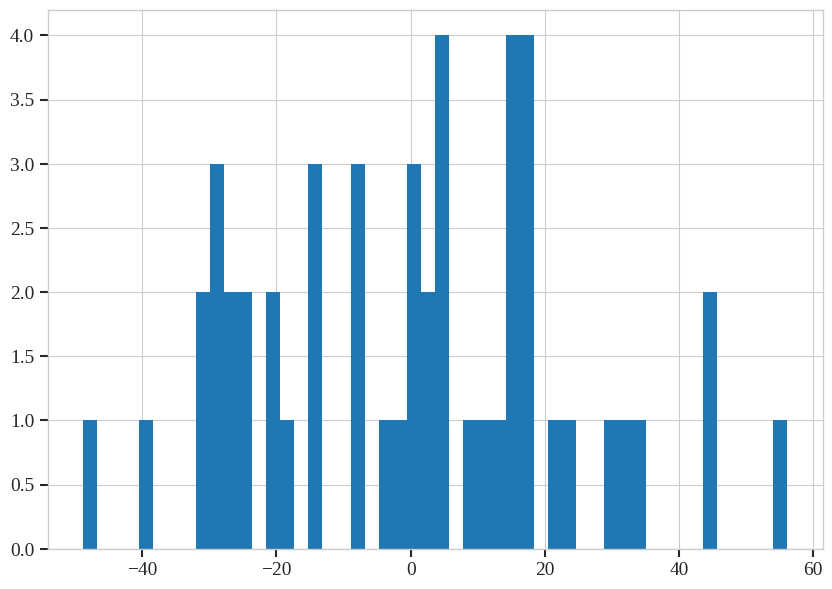

In [127]:
zes = np.cos(data['Gen_06']['true_zenith'])


nbins = 50
n, b = np.histogram(zes, bins =nbins)
mean = np.mean(n)
var = n - mean
std = np.std(n)

lower = mean - std
upper = mean + std
# 68-95-99.7
within_one = ((lower < n) & (n < upper)).sum()/len(n)
print(within_one)
within_two = ((mean - std*2 < n) & (n < mean + std*2)).sum()/len(n)
print(within_two)

In [158]:
current_dir = "sting"
mHNL = 10
(current_dir + '/testing_events{}.i3.zst'.format(mHNL))

'sting/testing_events10.i3.zst'

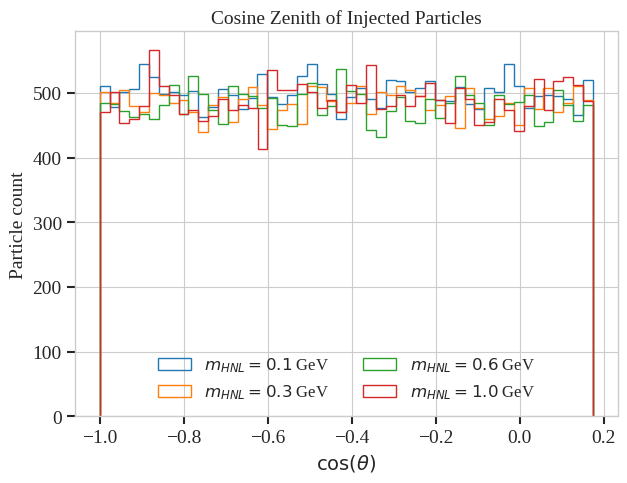

In [14]:
fig, ax = plt.subplots(figsize=[7, 5])
ax.hist(np.cos(data['Gen_01']['true_zenith']), label = '$m_{HNL} = 0.1$ GeV', histtype = 'step', bins = 50)
ax.hist(np.cos(data['Gen_03']['true_zenith']), label = '$m_{HNL} = 0.3$ GeV', histtype = 'step', bins = 50)
ax.hist(np.cos(data['Gen_06']['true_zenith']), label = '$m_{HNL} = 0.6$ GeV', histtype = 'step', bins = 50)
ax.hist(np.cos(data['Gen_10']['true_zenith']), label = '$m_{HNL} = 1.0$ GeV', histtype = 'step', bins = 50)

ax.set_title('Cosine Zenith of Injected Particles')
ax.set_xlabel(r'$\cos(\theta)$')
ax.set_ylabel('Particle count')
ax.legend(loc='lower center', ncol = 2)

filename = 'cos_zenith.png'
filepath = os.path.join(base_plot_dir,filename)
fig.savefig(filepath, dpi=300)

## Final State X and Y

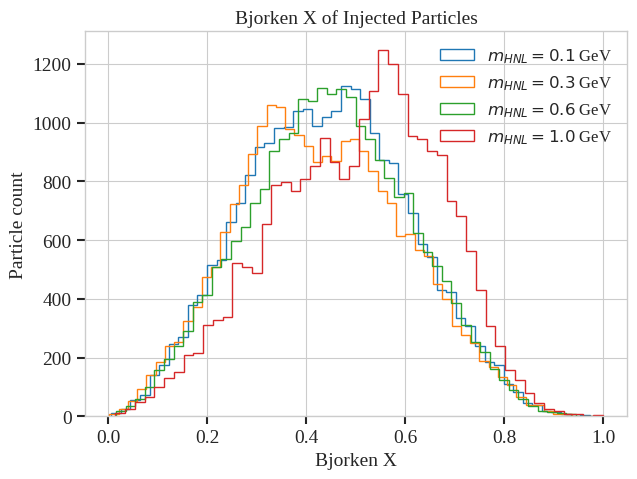

In [15]:
fig, ax = plt.subplots(figsize=[7, 5])
binning = 50

ax.hist(data['Gen_01']['finalStateX'], label = '$m_{HNL} = 0.1$ GeV', histtype = 'step', bins = binning)
ax.hist(data['Gen_03']['finalStateX'], label = '$m_{HNL} = 0.3$ GeV', histtype = 'step', bins = binning)
ax.hist(data['Gen_06']['finalStateX'], label = '$m_{HNL} = 0.6$ GeV', histtype = 'step', bins = binning)
ax.hist(data['Gen_10']['finalStateX'], label = '$m_{HNL} = 1.0$ GeV', histtype = 'step', bins = binning)

ax.set_yscale('linear')

ax.set_title('Bjorken X of Injected Particles')
ax.set_xlabel('Bjorken X')
ax.set_ylabel('Particle count')
ax.legend()

filename = 'bjorken_X.png'
filepath = os.path.join(base_plot_dir,filename)
fig.savefig(filepath, dpi=300)

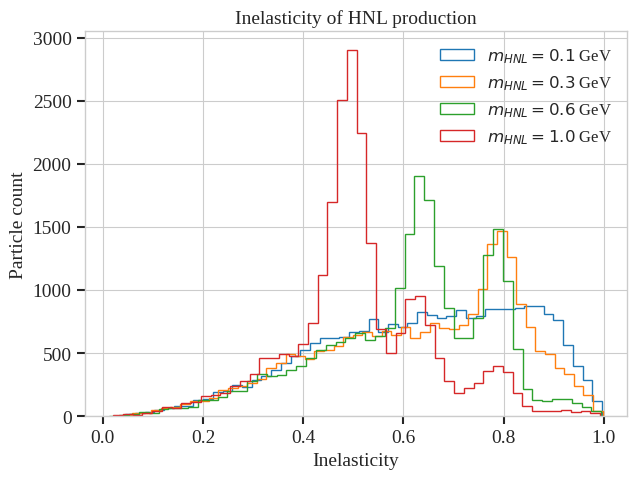

In [16]:
fig, ax = plt.subplots(figsize=[7, 5])
binning = 50

ax.hist(data['Gen_01']['finalStateY'], label = '$m_{HNL} = 0.1$ GeV', histtype = 'step', bins = binning)
ax.hist(data['Gen_03']['finalStateY'], label = '$m_{HNL} = 0.3$ GeV', histtype = 'step', bins = binning)
ax.hist(data['Gen_06']['finalStateY'], label = '$m_{HNL} = 0.6$ GeV', histtype = 'step', bins = binning)
ax.hist(data['Gen_10']['finalStateY'], label = '$m_{HNL} = 1.0$ GeV', histtype = 'step', bins = binning)

ax.set_yscale('linear')

ax.set_title('Inelasticity of HNL production')
ax.set_xlabel('Inelasticity')
ax.set_ylabel('Particle count')
ax.legend()

filename = 'inelasticity.png'
filepath = os.path.join(base_plot_dir,filename)
fig.savefig(filepath, dpi=300)

In [17]:
nununu_mask={}

nununu_mask['Gen_01'] = data['Gen_01']['decay_channel']!=1
nununu_mask['Gen_03'] = data['Gen_03']['decay_channel']!=1
nununu_mask['Gen_06'] = data['Gen_06']['decay_channel']!=1
nununu_mask['Gen_10'] = data['Gen_10']['decay_channel']!=1

print(len(data['Gen_01']['decay_channel']*nununu_mask['Gen_01']))

25000


In [18]:
nununu_mask['Gen_01'].head()

0    False
1    False
2    False
3    False
4    False
Name: decay_channel, dtype: bool

In [19]:
ve_01 = data['Gen_01']['casc0_true_energy'] + (data['Gen_01']['casc1_true_energy'] - data['Gen_01']['outgoing_neutrino_energy'])*nununu_mask['Gen_01']


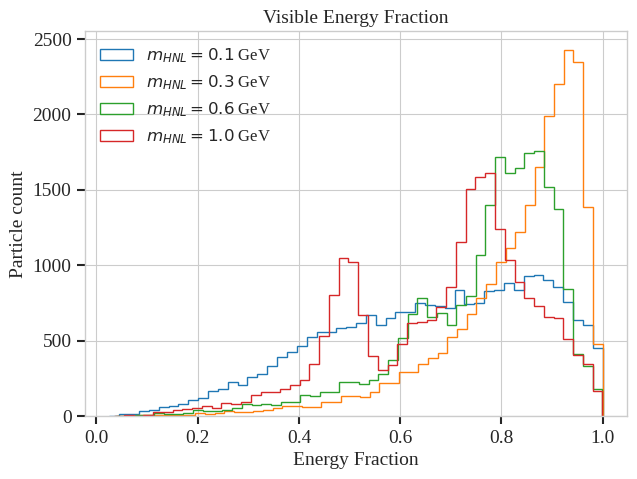

In [20]:
fig, ax = plt.subplots(figsize=[7, 5])
binning = 50

ve_01 = data['Gen_01']['casc0_true_energy'] + (data['Gen_01']['casc1_true_energy'] - data['Gen_01']['outgoing_neutrino_energy'])*nununu_mask['Gen_01']
vef_01 = ve_01/data['Gen_01']['true_energy']

ve_03 = data['Gen_03']['casc0_true_energy'] + (data['Gen_03']['casc1_true_energy'] - data['Gen_03']['outgoing_neutrino_energy'])*nununu_mask['Gen_03']
vef_03 = ve_03/data['Gen_03']['true_energy']

ve_06 = data['Gen_06']['casc0_true_energy'] + (data['Gen_06']['casc1_true_energy'] - data['Gen_06']['outgoing_neutrino_energy'])*nununu_mask['Gen_06']
vef_06 = ve_06/data['Gen_06']['true_energy']

ve_10 = data['Gen_10']['casc0_true_energy'] + (data['Gen_10']['casc1_true_energy'] - data['Gen_10']['outgoing_neutrino_energy'])*nununu_mask['Gen_10']
vef_10 = ve_10/data['Gen_10']['true_energy']



ax.hist(vef_01, label = '$m_{HNL} = 0.1$ GeV', histtype = 'step', bins = binning)
ax.hist(vef_03, label = '$m_{HNL} = 0.3$ GeV', histtype = 'step', bins = binning)
ax.hist(vef_06, label = '$m_{HNL} = 0.6$ GeV', histtype = 'step', bins = binning)
ax.hist(vef_10, label = '$m_{HNL} = 1.0$ GeV', histtype = 'step', bins = binning)

ax.set_yscale('linear')

ax.set_title('Visible Energy Fraction')
ax.set_xlabel('Energy Fraction')
ax.set_ylabel('Particle count')
ax.legend(loc='upper left')

filename = 'visible_energy_fraction.png'
filepath = os.path.join(base_plot_dir,filename)
# fig.savefig(filepath, dpi=300)

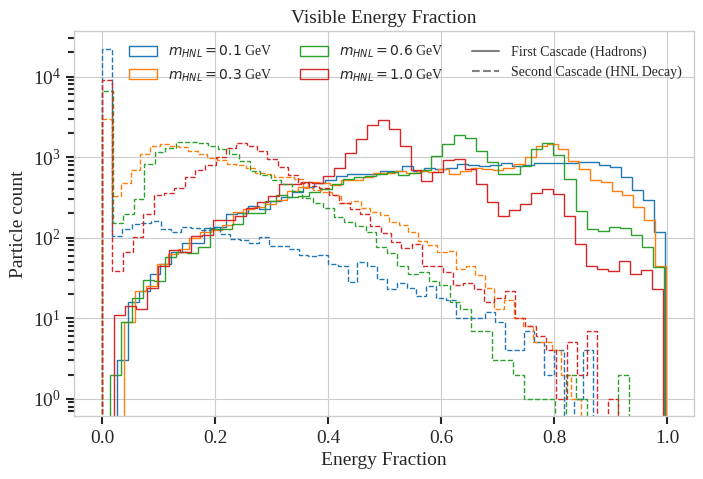

In [27]:
#Visible energy fraction in each cascade

fig1, ax1 = plt.subplots(figsize=[8, 5])
binning = 50

ve2_01 = (data['Gen_01']['casc1_true_energy'] - data['Gen_01']['outgoing_neutrino_energy'])*nununu_mask['Gen_01']
vef2_01 = ve2_01/data['Gen_01']['true_energy']

ve2_03 = (data['Gen_03']['casc1_true_energy'] - data['Gen_03']['outgoing_neutrino_energy'])*nununu_mask['Gen_03']
vef2_03 = ve2_03/data['Gen_03']['true_energy']

ve2_06 = (data['Gen_06']['casc1_true_energy'] - data['Gen_06']['outgoing_neutrino_energy'])*nununu_mask['Gen_06']
vef2_06 = ve2_06/data['Gen_06']['true_energy']

ve2_10 =(data['Gen_10']['casc1_true_energy'] - data['Gen_10']['outgoing_neutrino_energy'])*nununu_mask['Gen_10']
vef2_10 = ve2_10/data['Gen_10']['true_energy']

vef1_01 = data['Gen_01']['casc0_true_energy']/data['Gen_01']['true_energy']
vef1_03 = data['Gen_03']['casc0_true_energy']/data['Gen_03']['true_energy']
vef1_06 = data['Gen_06']['casc0_true_energy']/data['Gen_06']['true_energy']
vef1_10 = data['Gen_10']['casc0_true_energy']/data['Gen_10']['true_energy']

ax1.hist(vef1_01, label = '$m_{HNL} = 0.1$ GeV', histtype = 'step', bins = binning, color=colors[0])
ax1.hist(vef1_03, label = '$m_{HNL} = 0.3$ GeV', histtype = 'step', bins = binning, color=colors[1])
ax1.hist(vef1_06, label = '$m_{HNL} = 0.6$ GeV', histtype = 'step', bins = binning, color=colors[2])
ax1.hist(vef1_10, label = '$m_{HNL} = 1.0$ GeV', histtype = 'step', bins = binning, color=colors[3])

ax1.hist(vef2_01, histtype = 'step', bins = binning, linestyle='dashed', color=colors[0])
ax1.hist(vef2_03, histtype = 'step', bins = binning, linestyle='dashed', color=colors[1])
ax1.hist(vef2_06, histtype = 'step', bins = binning, linestyle='dashed', color=colors[2])
ax1.hist(vef2_10, histtype = 'step', bins = binning, linestyle='dashed', color=colors[3])


ax1.plot([], linestyle = 'solid', label = 'First Cascade (Hadrons)', color = 'gray')
ax1.plot([], linestyle = 'dashed', label = 'Second Cascade (HNL Decay)', color = 'gray')

ax1.set_yscale('log')

ax1.set_title('Visible Energy Fraction')
ax1.set_xlabel('Energy Fraction')
ax1.set_ylabel('Particle count')
ax1.legend(loc='upper right', ncol=3, fontsize=10)

filename = 'visible_energy_fraction_by_cascade.png'
filepath = os.path.join(base_plot_dir,filename)
fig.savefig(filepath, dpi=300)

#Note that the three nuetrino decay mode produces no visible energy

In [ ]:
fig, ax = plt.subplots(figsize=[7, 5])
binning = np.logspace(-0.1, 4, 50)

ax.hist(data['Gen_01']['true_energy'], label = '$m_{HNL} = 0.1$ GeV', histtype = 'step', bins = binning, color = colors[0])
ax.hist(data['Gen_03']['true_energy'], label = '$m_{HNL} = 0.3$ GeV', histtype = 'step', bins = binning, color = colors[1])
ax.hist(data['Gen_06']['true_energy'], label = '$m_{HNL} = 0.6$ GeV', histtype = 'step', bins = binning, color = colors[2])
ax.hist(data['Gen_10']['true_energy'], label = '$m_{HNL} = 1.0$ GeV', histtype = 'step', bins = binning, color = colors[3])

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_title('Incoming Neutrino Energy')
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('Particle count')
ax.legend(loc='upper right')

filename = 'total_energy.png'
filepath = os.path.join(base_plot_dir,filename)
fig.savefig(filepath, dpi=300)

In [ ]:
fig, ax = plt.subplots(figsize=[7, 5])
binning = np.logspace(-0.1, 4, 50)

ax.hist(ve_01, label = '$m_{HNL} = 0.1$ GeV', histtype = 'step', bins = binning, color = colors[0])
ax.hist(ve_03, label = '$m_{HNL} = 0.3$ GeV', histtype = 'step', bins = binning, color = colors[1])
ax.hist(ve_06, label = '$m_{HNL} = 0.6$ GeV', histtype = 'step', bins = binning, color = colors[2])
ax.hist(ve_10, label = '$m_{HNL} = 1.0$ GeV', histtype = 'step', bins = binning, color = colors[3])

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_title('Visible Energy')
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('Particle count')
ax.legend(loc='upper right')

filename = 'visible_energy.png'
filepath = os.path.join(base_plot_dir,filename)
fig.savefig(filepath, dpi=300)

In [ ]:
# Visible energy in each cascade
fig, ax = plt.subplots(figsize=[7, 5])
binning = np.logspace(-0.1, 4, 50)
#Add lines for the IceCube, DeepCore, and Upgrade approximate energy thresholds
ax.axvline(x=2, color='black', linestyle='-', linewidth=1, alpha=0.75)
ax.text(.14, 0.25, 'Upgrade', rotation=90, transform=plt.gca().transAxes)
ax.axvline(x=10, color='black', linestyle='-', linewidth=1, alpha=0.75)
ax.text(.295, 0.25, 'DeepCore', rotation=90, transform=plt.gca().transAxes)
ax.axvline(x=100, color='black', linestyle='-', linewidth=1, alpha=0.75)
ax.text(.515, 0.65, 'Main Array', rotation=90, transform=plt.gca().transAxes)


ax.hist(data['Gen_01']['casc0_true_energy'], histtype = 'step', bins = binning, color = colors[0], linestyle='dashed')
ax.hist(data['Gen_03']['casc0_true_energy'], histtype = 'step', bins = binning, color = colors[1], linestyle='dashed')
ax.hist(data['Gen_06']['casc0_true_energy'], histtype = 'step', bins = binning, color = colors[2], linestyle='dashed')
ax.hist(data['Gen_10']['casc0_true_energy'], histtype = 'step', bins = binning, color = colors[3], linestyle='dashed')
    
ax.hist(ve_01 - data['Gen_01']['casc0_true_energy'], label = '$m_{HNL} = 0.1$ GeV', histtype = 'step', bins = binning, color = colors[0])
ax.hist(ve_03 - data['Gen_03']['casc0_true_energy'], label = '$m_{HNL} = 0.3$ GeV', histtype = 'step', bins = binning, color = colors[1])
ax.hist(ve_06 - data['Gen_06']['casc0_true_energy'], label = '$m_{HNL} = 0.6$ GeV', histtype = 'step', bins = binning, color = colors[2])
ax.hist(ve_10 - data['Gen_10']['casc0_true_energy'], label = '$m_{HNL} = 1.0$ GeV', histtype = 'step', bins = binning, color = colors[3])

ax.plot([], linestyle = 'dashed', label = 'First Cascade (Hadrons)', color = 'gray')
ax.plot([], linestyle = 'solid', label = 'Second Cascade (HNL Decay)', color = 'gray')

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_title('Visible Energy')
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('Particle count')
ax.legend(loc='upper right', fontsize=10)

filename = 'visible_energy_cascades.png'
filepath = os.path.join(base_plot_dir,filename)
fig.savefig(filepath, dpi=300)

In [ ]:
# Visible energy in each cascade
fig, ax = plt.subplots(figsize=[7, 5])
binning = np.logspace(-0.1, 4, 50)
#Add lines for the IceCube, DeepCore, and Upgrade approximate energy thresholds
ax.axvline(x=2, color='black', linestyle='-', linewidth=1, alpha=0.75)
ax.text(.14, 0.35, 'Upgrade', rotation=90, transform=plt.gca().transAxes)
ax.axvline(x=10, color='black', linestyle='-', linewidth=1, alpha=0.75)
ax.text(.295, 0.25, 'DeepCore', rotation=90, transform=plt.gca().transAxes)
ax.axvline(x=100, color='black', linestyle='-', linewidth=1, alpha=0.75)
ax.text(.515, 0.65, 'Main Array', rotation=90, transform=plt.gca().transAxes)

ax.hist(data['Gen_01']['casc0_true_energy'], label = 'first cascade', histtype = 'step', bins = binning, color = colors[0], linestyle='dashed')    
ax.hist(ve_01 - data['Gen_01']['casc0_true_energy'], label = 'second cascade', histtype = 'step', bins = binning, color = colors[0])

# ax.set_yscale('log')
ax.set_xscale('log')

ax.set_title('Visible Energy')
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('Particle count')
ax.legend(loc='upper right', title = '$m_{HNL} = 0.1$ GeV')

filename = 'visible_energy_cascades_single_mass.png'
filepath = os.path.join(base_plot_dir,filename)
fig.savefig(filepath, dpi=300)

## Cascade Separation distance

For this, we're going to choose one representative mass

In [ ]:
fig, ax = plt.subplots(figsize=[7, 5])
binning = np.logspace(-0.1, 3.1, 50)

ax.hist(data['Gen_06']['distance'], label = 'simulated decay length', histtype = 'step', bins = binning, color = colors[0])

dist_sq = (data['Gen_06']['casc0_true_x'] - data['Gen_06']['casc1_true_x'])**2 + (data['Gen_06']['casc0_true_y'] - data['Gen_06']['casc1_true_y'])**2 + (data['Gen_06']['casc0_true_z'] - data['Gen_06']['casc1_true_z'])**2
dist = np.sqrt(dist_sq)

ax.hist(dist, label = 'distance between cascade origins', histtype = 'step', bins = binning, color = colors[2])

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_title('HNL Decay Distance, m = 0.6 GeV')
ax.set_xlabel('distance (m)')
ax.set_ylabel('Particle count')

KS_result = stats.kstest(dist, data['Gen_06']['distance'])
ks_result = 'KS Statistics:\nD = {D:.{n}}, p = {p:.{n}}'.format(D = KS_result[0], p = KS_result[1], n=4)

ax.legend(loc='lower center', title = ks_result)

filename = 'decay_length.png'
filepath = os.path.join(base_plot_dir,filename)
fig.savefig(filepath, dpi=300)

In [ ]:
fig, ax = plt.subplots(figsize=[7, 5])
binning = np.logspace(-0.1, 3.1, 50)

ax.hist(data['Gen_01']['distance'], label = '$m_{HNL = 0.1}$ GeV', histtype = 'step', bins = binning)
ax.hist(data['Gen_03']['distance'], label = '$m_{HNL = 0.3}$ GeV', histtype = 'step', bins = binning)
ax.hist(data['Gen_06']['distance'], label = '$m_{HNL = 0.6}$ GeV', histtype = 'step', bins = binning)
ax.hist(data['Gen_10']['distance'], label = '$m_{HNL = 1.0}$ GeV', histtype = 'step', bins = binning)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_title('HNL Decay Distance')
ax.set_xlabel('distance (m)')
ax.set_ylabel('Particle count')

ax.legend(loc='lower center')

filename = 'decay_length_all_masses.png'
filepath = os.path.join(base_plot_dir,filename)
fig.savefig(filepath, dpi=300)

## Recovering Inelasticity

In [ ]:
# Checking inelasticity and energy assignment
# HNL total energy should be (1-y)*total energy, and the hadrons object should take y*total energy

totalE = data['Gen_03']['true_energy']
y = data['Gen_03']['finalStateY']
HNL_E = data['Gen_03']['HNL_true_energy']
HNL_total_E = HNL_E + 0.3
casc0_E = data['Gen_03']['casc0_true_energy']

fig, ax = plt.subplots(figsize=(7, 5))
n, b, p = ax.hist(
                (1 - y)*totalE,
                lw=1.,
                histtype='step',
                label='(1-y)*E',
                )
m, c, q = ax.hist(
                HNL_E,
                lw=1.,
                histtype='step',
                label='HNL kinetic energy',
                )
n1, b1, p1 = ax.hist(
                (y)*totalE,
                lw=1.,
                histtype='step',bins=50,
                label='y*E',
                )
m1, c1, q1 = ax.hist(
                casc0_E,
                lw=1.,
                histtype='step',bins=50,
                label='Hadronic cascade energy',
                )
KS_result_had = stats.kstest((data['Gen_03']['finalStateY'])*totalE, casc0_E)
ks_result_had = 'Hadrons: D = {D:.{n}}, p = {p:.{n}}'.format(D = KS_result_had[0], p = KS_result_had[1], n=4)

KS_result_hnl = stats.kstest((1-data['Gen_03']['finalStateY'])*totalE, HNL_E)
ks_result_hnl = 'HNL KE: D = {D:.{n}}, p = {p:.{n}}'.format(D = KS_result_hnl[0], p = KS_result_hnl[1], n=4)

KS_result_hnl_tot = stats.kstest((1-data['Gen_03']['finalStateY'])*totalE, HNL_total_E)
ks_result_hnl_tot = 'HNL total E: D = {D:.{n}}, p = {p:.{n}}'.format(D = KS_result_hnl_tot[0], p = KS_result_hnl_tot[1], n=4)


print("KS Test results:")
print(ks_result_had)
print(ks_result_hnl)
print(ks_result_hnl_tot)

ax.set_yscale('log')
ax.legend()

ax.set_title('Calculated and simulated energy, m = 0.3 GeV')
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('Particle count')

filename = 'energy_03.png'
filepath = os.path.join(base_plot_dir,filename)
fig.savefig(filepath, dpi=300)

# Digging deeper into Y distribution

In [ ]:
#To-do: Figure out what to compare these to. We can't pull straight from the cross section...
#Should we plot on and save it somewhere?

Bjorken_X = data['Gen_06']['finalStateX']
inelasticity = data['Gen_06']['finalStateY']
import seaborn as sns

sns.jointplot(data = data['Gen_06'], x = 'finalStateX', y = 'finalStateY', kind='hist')

# KS_result = stats.kstest(new_x, benchmark_x)
# ks_result = 'D = {D:.{n}}, p = {p:.{n}}'.format(D = KS_result[0], p = KS_result[1], n=4)
    
# print(ks_result)

In [ ]:
sns.jointplot(data = data['Gen_06'], x = 'totalEnergy', y = 'finalStateY', kind='hist')


## Figuring out inelasticity

In [ ]:
fig, ax = plt.subplots(figsize=[7, 5])
binning = 50

for i, mode in enumerate(decay_channels):
    mask = data['Gen_06']['decay_channel']==i
    ax.hist(vef_06[mask], label = mode, histtype = 'step', bins = binning)
    
ax.set_yscale('linear')

ax.set_title('Visible Energy Fraction by decay mode')
ax.set_xlabel('Energy Fraction')
ax.set_ylabel('Particle count')
ax.legend(loc='upper left')

filename = 'visible_energy_fraction_by_mode.png'
filepath = os.path.join(base_plot_dir,filename)
# fig.savefig(filepath, dpi=300)

In [ ]:
fig, ax = plt.subplots(figsize=[7, 5])
binning = 25

for i, mode in enumerate(decay_channels):
    mask = data['Gen_10']['decay_channel']==i
    ax.hist(vef_10[mask], label = mode, histtype = 'step', bins = binning)
    
ax.set_yscale('linear')

ax.set_title('Visible Energy Fraction by decay mode')
ax.set_xlabel('Energy Fraction')
ax.set_ylabel('Particle count')
ax.legend(loc='upper left')

filename = 'visible_energy_fraction_by_mode.png'
filepath = os.path.join(base_plot_dir,filename)

In [ ]:
fig, ax = plt.subplots(figsize=[7, 5])
binning = 50

for i, mode in enumerate(decay_channels):
    mask = data['Gen_10']['decay_channel']==i
    ax.hist(data['Gen_10']['finalStateY'][mask], label = mode, histtype = 'step', bins = binning, density = True)
    
ax.set_yscale('linear')

ax.set_title('Inelasticity by decay mode')
ax.set_xlabel('Inelasticity')
ax.set_ylabel('Particle count')
ax.legend(loc='upper left')

filename = 'inelasticity_by_mode.png'
filepath = os.path.join(base_plot_dir,filename)

In [ ]:
fig, ax = plt.subplots(figsize=[7, 5])
binning = 50

for i, mode in enumerate(decay_channels):
    mask = data['Gen_06']['decay_channel']==i
    ax.hist(data['Gen_06']['finalStateY'][mask], label = mode, histtype = 'step', bins = binning, density = True)
    
ax.set_yscale('linear')

ax.set_title('Inelasticity by decay mode')
ax.set_xlabel('Inelasticity')
ax.set_ylabel('Particle count')
ax.legend(loc='upper left')

filename = 'inelasticity_by_mode.png'
filepath = os.path.join(base_plot_dir,filename)

In [ ]:
fig, ax = plt.subplots(figsize=[7, 5])
binning = 50

for i, level in enumerate(levels):
    ax.hist(data[level]['finalStateX'], label = level, histtype = 'step', bins = binning, density = True)
      
ax.set_yscale('linear')

ax.set_title('X by decay mode')
ax.set_xlabel('Bjorken X')
ax.set_ylabel('Particle count')
ax.legend(loc='upper left')

filename = 'x_by_mode.png'
filepath = os.path.join(base_plot_dir,filename)

In [30]:
data['Gen_01']['mHNL'][0]

0.1

# Momentum Conservation
The following plots check momentum conservation, illustrating what goes on in the double-cascade event

In [ ]:
def velocity(df):
    time_rest = df['lifetime'] #yes, lifetime is HNL lifetime in the rest frame!
    gamma = (1-df['finalStateY'])*df['true_energy']/df['mHNL']
    time_lab = gamma*time_rest

    distance = df['distance']

    velocity = distance/time_lab
    return velocity

def sr_velocity(df):
    c = 3*10**(-1)
    gamma = (1-df['finalStateY'])*df['true_energy']/df['mHNL']
    pc = np.sqrt(df['HNL_true_energy']**2 - (df['mHNL']*gamma)**2)

    sr_velocity = c*np.sqrt(1-(1/(gamma**2)))
    return sr_velocity

def plot_velocities(df):
    plt.hist(velocity(df), bins=50, label = 'classical', histtype='step', lw=1.5)
    plt.hist(sr_velocity(df), bins=50, label = 'relativistic', histtype='step', lw=1.5)
    plt.yscale('log')
    plt.legend(loc='upper left')

In [ ]:
plot_velocities(data['Gen_06'])

KS_result = stats.ks_2samp(velocity(data['Gen_06']), sr_velocity(data['Gen_06']))
ks_result = 'D = {D:.{n}}, p = {p:.{n}}'.format(D = KS_result[0], p = KS_result[1], n=4)

print(ks_result)

In [ ]:
#For concision, we define some shorter variable names
trueE = level_data_new['Gen_03']['true_energy']
HNL_E = level_data_new['Gen_03']['HNL_true_energy']
casc0_E = level_data_new['Gen_03']['casc0_true_energy']
casc1_E = level_data_new['Gen_03']['casc1_true_energy']
totalE = level_data_new['Gen_03']['totalEnergy']
nu_outE = level_data_new['Gen_03']['outgoing_neutrino_energy']
mHNL = level_data_new['Gen_03']['mHNL']

#We calculate some useful quantites not saved in the MCTree
HNL_total_E = np.sqrt(HNL_E**2 + mHNL**2) # HNL_true_energy is kinetic energy only

In [ ]:
# Energy of the outgoing neutrino

#make log/log
binning = np.linspace(min(data['Gen_03']['casc1_true_energy']), max(data['Gen_03']['casc1_true_energy']), 50)
fig, ax = plt.subplots(figsize=(7, 5))
n, b, p = ax.hist(
                data['Gen_03']['outgoing_neutrino_energy'],
                lw=1.,
                histtype='step',
                label='outgoing neutrino',bins=binning
                )
n1, b1, p1 = ax.hist(
                data['Gen_03']['casc1_true_energy'],
                lw=1.,
                histtype='step',
                label='second cascade',bins=binning
                )

ax.set_yscale('log')
ax.legend()



In [ ]:
fig12, ax12 = plt.subplots(figsize=(7, 2))

ax12.hist(data['Gen_03']['outgoing_neutrino_energy']/data['Gen_03']['casc1_true_energy'], lw=1., label='neutrino energy fraction' )



In [ ]:
# Visible energy fractions of the first and second cascades
fig, ax = plt.subplots(figsize=(7, 5))
n, b, p = ax.hist(
                casc0_E/trueE,
                lw=1.,
                histtype='step',
                label='hadronic cascade at interaction point',
                bins=50
                )
n1, b1, p1 = ax.hist(
                (casc1_E-nu_outE)/HNL_total_E,
                lw=1.,
                histtype='step',
                label='cascade produced by HNL decay',
                bins=50
                )

#ax.set_xlim(-1, 2)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Inelasticity of each cascade')
#ax.legend()

#Split orange by components - rewrite processing script

For the first cascade, we recover the finalStateY distribution, as expected. 
For the seconda cascade, any "inelasticity" here is due to imprecision, much of which is caused by daughter energies being calculated to six significant figures in the madgraph files. 
We can also see here that, to good approximation, the energy loss in the full production-decay process occurs entirely in the formation of the first cascade.

In [ ]:
# Checking inelasticity and energy assignment
# HNL total energy should be (1-y)*total energy, and the hadrons object should take y*total energy
fig, ax = plt.subplots(figsize=(7, 5))
n, b, p = ax.hist(
                (1 - level_data_new['Gen_03']['finalStateY'])*totalE,
                lw=1.,
                histtype='step',
                label='(1-y)*E',
                )
m, c, q = ax.hist(
                HNL_E,
                lw=1.,
                histtype='step',
                label='HNL kinetic energy',
                )
m2, c2, q2 = ax.hist(
                HNL_total_E,
                lw=1.,
                histtype='step',
                label='HNL total energy',
                )
n1, b1, p1 = ax.hist(
                (level_data_new['Gen_03']['finalStateY'])*totalE,
                lw=1.,
                histtype='step',bins=50,
                label='y*E',
                )
m1, c1, q1 = ax.hist(
                casc0_E,
                lw=1.,
                histtype='step',bins=50,
                label='Hadronic cascade energy',
                )
KS_result_had = stats.kstest((level_data_new['Gen_03']['finalStateY'])*totalE, casc0_E)
ks_result_had = 'Hadrons: D = {D:.{n}}, p = {p:.{n}}'.format(D = KS_result_had[0], p = KS_result_had[1], n=4)

KS_result_hnl = stats.kstest((1-level_data_new['Gen_03']['finalStateY'])*totalE, HNL_E)
ks_result_hnl = 'HNL KE: D = {D:.{n}}, p = {p:.{n}}'.format(D = KS_result_hnl[0], p = KS_result_hnl[1], n=4)

KS_result_hnl_tot = stats.kstest((1-level_data_new['Gen_03']['finalStateY'])*totalE, HNL_total_E)
ks_result_hnl_tot = 'HNL total E: D = {D:.{n}}, p = {p:.{n}}'.format(D = KS_result_hnl_tot[0], p = KS_result_hnl_tot[1], n=4)


print("KS Test results:")
print(ks_result_had)
print(ks_result_hnl)
print(ks_result_hnl_tot)

ax.set_yscale('log')
ax.legend()